In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.set_style("darkgrid")

## Load Dataset

In [5]:
df = pd.read_csv("data.csv")
df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [ ]:
df.drop("Unnamed: 0",axis=1, inplace=True)          # inplace 替代原本 dataframe
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


## Data Cleaning

In [ ]:
df.isna().sum()

,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0
mode,0
speechiness,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [ ]:
df.shape

(2017, 16)

In [ ]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [ ]:
len(df.columns)

16

In [ ]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


## Data Analysis

### Top 5 most popular artists

In [ ]:
top_five_artists = df.groupby("artist").count().sort_values(by="song_title",ascending=False)["song_title"][:5]        # 查看哪五位藝人的歌最多
top_five_artists

,song_title
artist,
Drake,16
Rick Ross,13
Disclosure,12
Backstreet Boys,10
WALK THE MOON,10


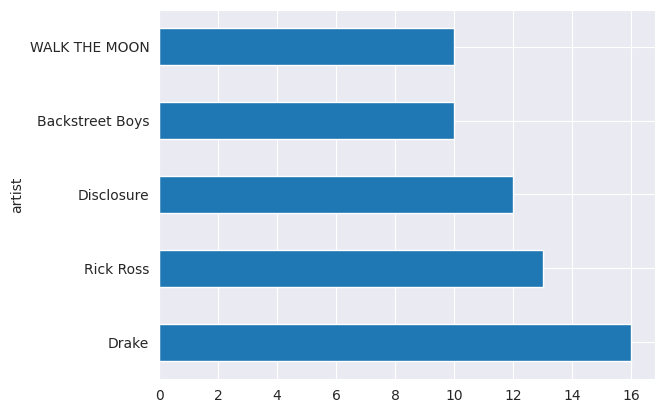

In [ ]:
top_five_artists.plot.barh()
plt.show()

### Top 5 loudest tracks

In [ ]:
top_five_loudest_tracks = df[['loudness', 'song_title']].sort_values(by='loudness',ascending=True)[:5]
top_five_loudest_tracks

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor


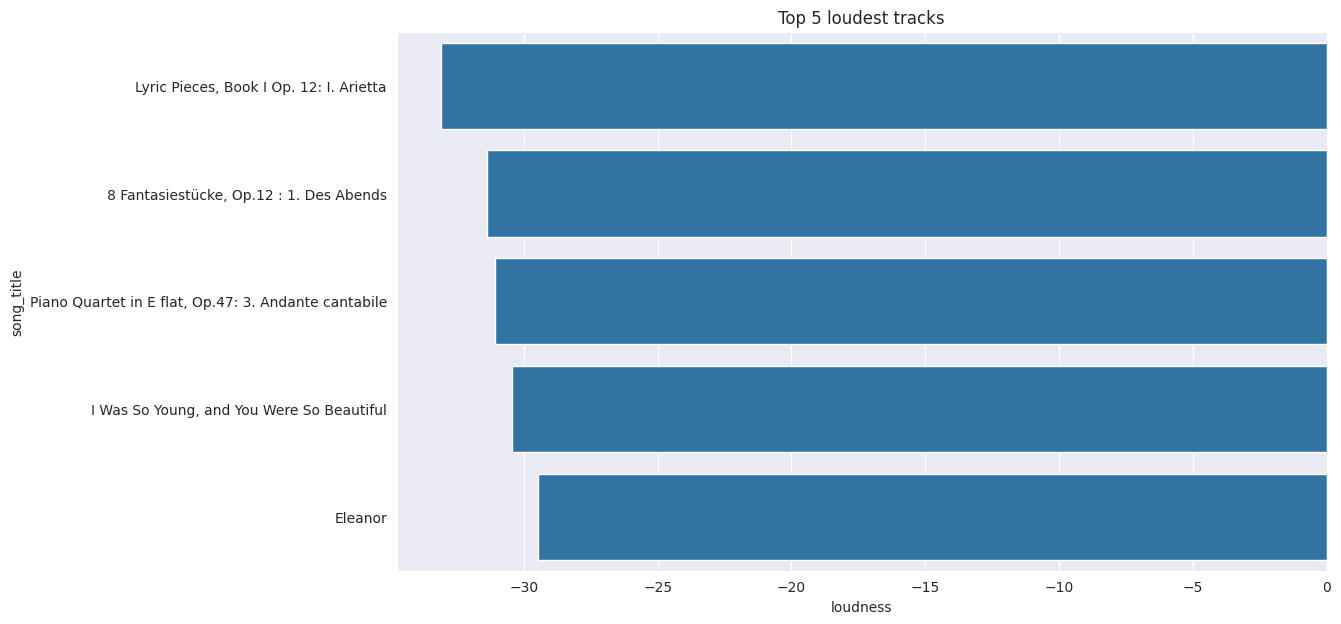

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x='loudness',y='song_title',data = top_five_loudest_tracks)
plt.title("Top 5 loudest tracks")
plt.show()

### Artist with the most danceability song

In [ ]:
top_five_artists_danceable_songs = df[["danceability", "song_title", "artist"]].sort_values(by='danceability', ascending=False)[:5]
top_five_artists_danceable_songs

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


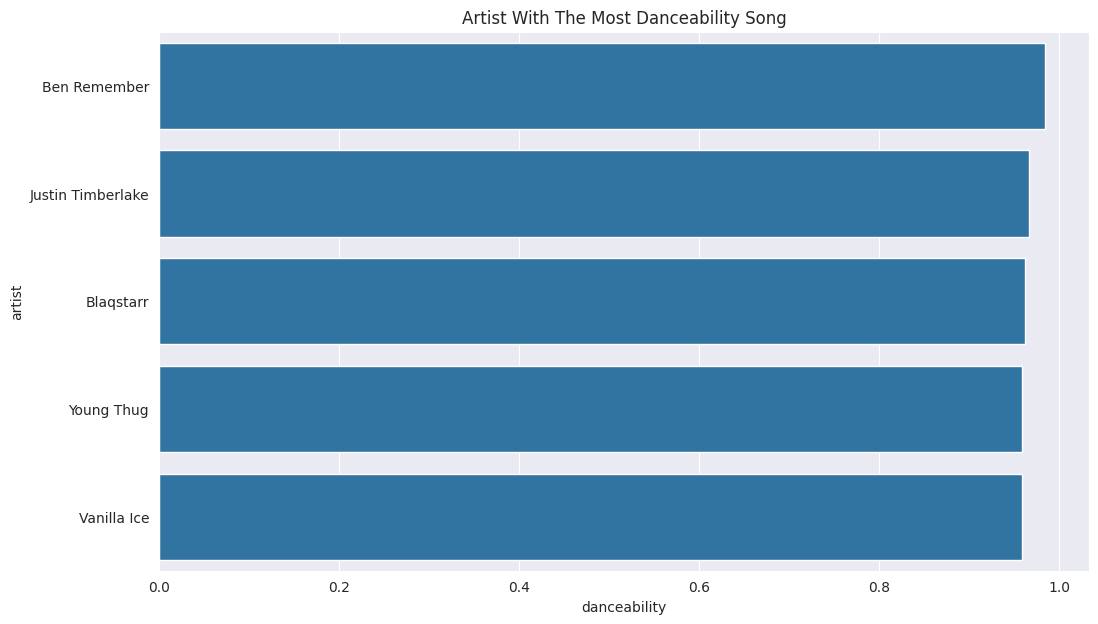

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x='danceability',y='artist', data=top_five_artists_danceable_songs)
plt.title("Artist With The Most Danceability Song")
plt.show()

### Top 5 instrumentalness tracks

In [ ]:
top_ten_instrumentalness_tracks = df[['instrumentalness','song_title','artist']].sort_values(by='instrumentalness',ascending=False)[:5]
top_ten_instrumentalness_tracks

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje


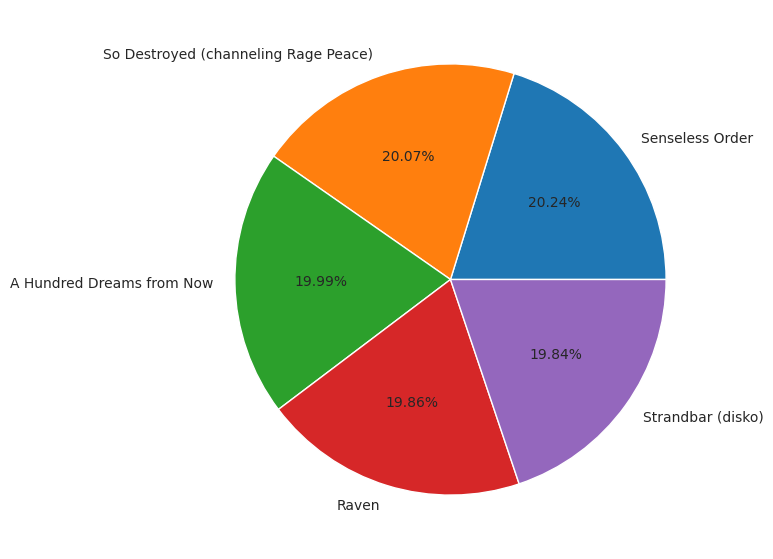

In [ ]:
plt.figure(figsize=(12,7))
plt.pie(x='instrumentalness',data=top_ten_instrumentalness_tracks, autopct='%1.2f%%', labels=top_ten_instrumentalness_tracks.song_title)
plt.show()

### Multiple feature plots

In [6]:
interest_feature_cols = [ 'tempo', 'loudness', 'acousticness', 'danceability', 'duration_ms',
                         'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence' ]

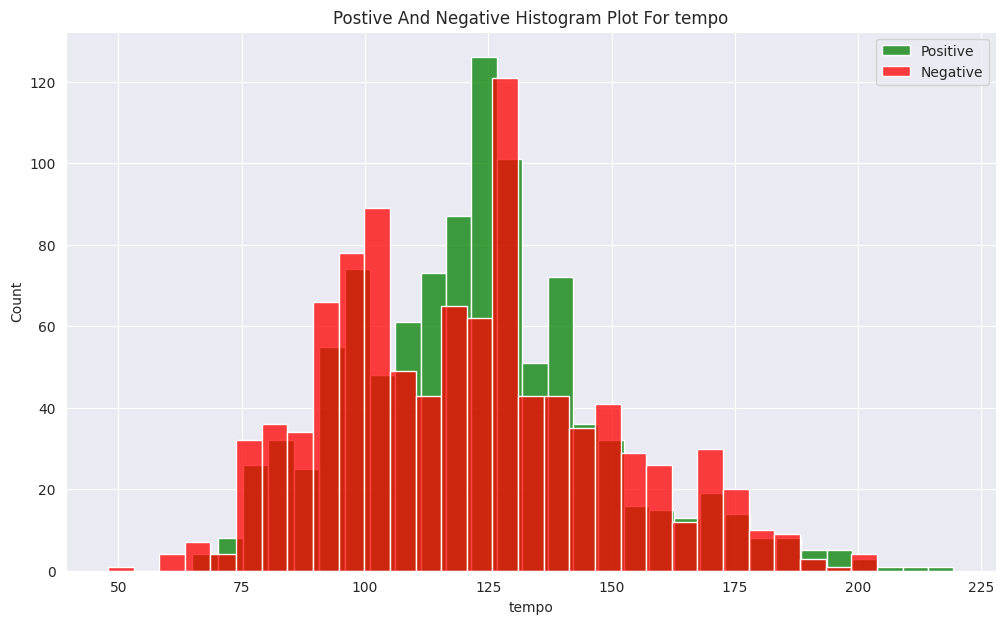

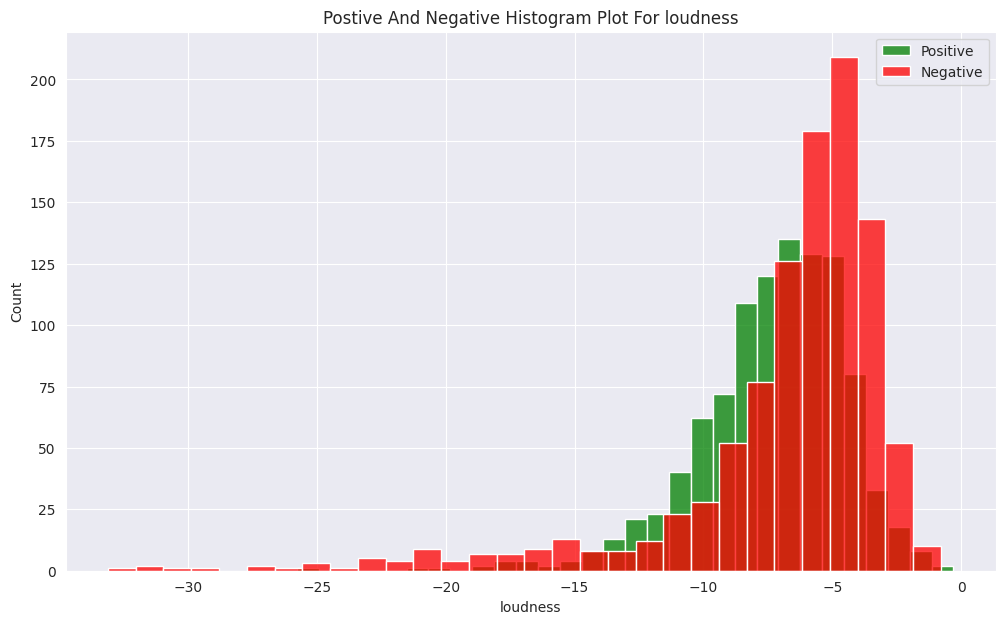

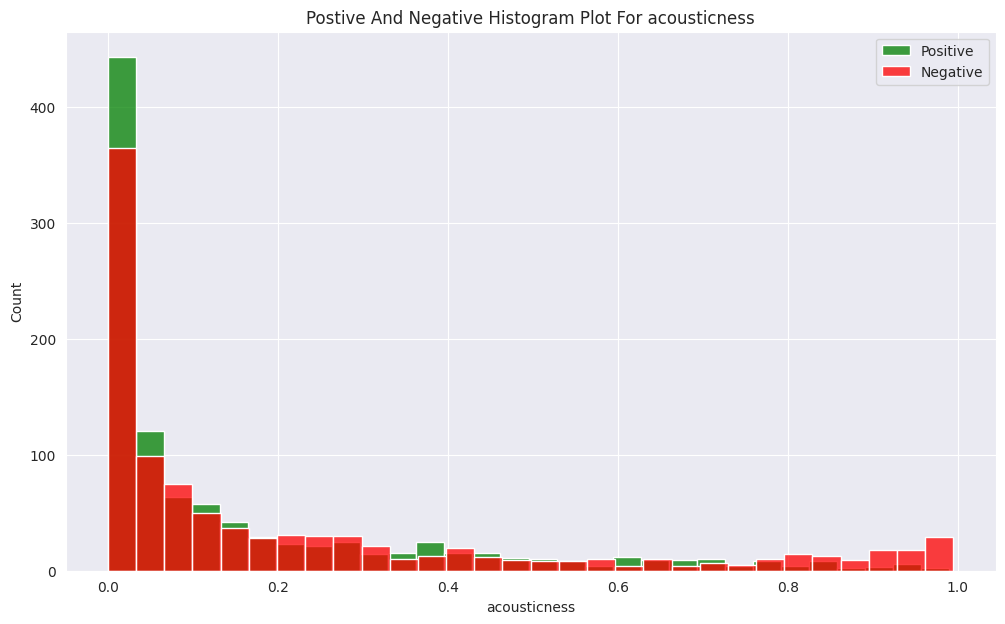

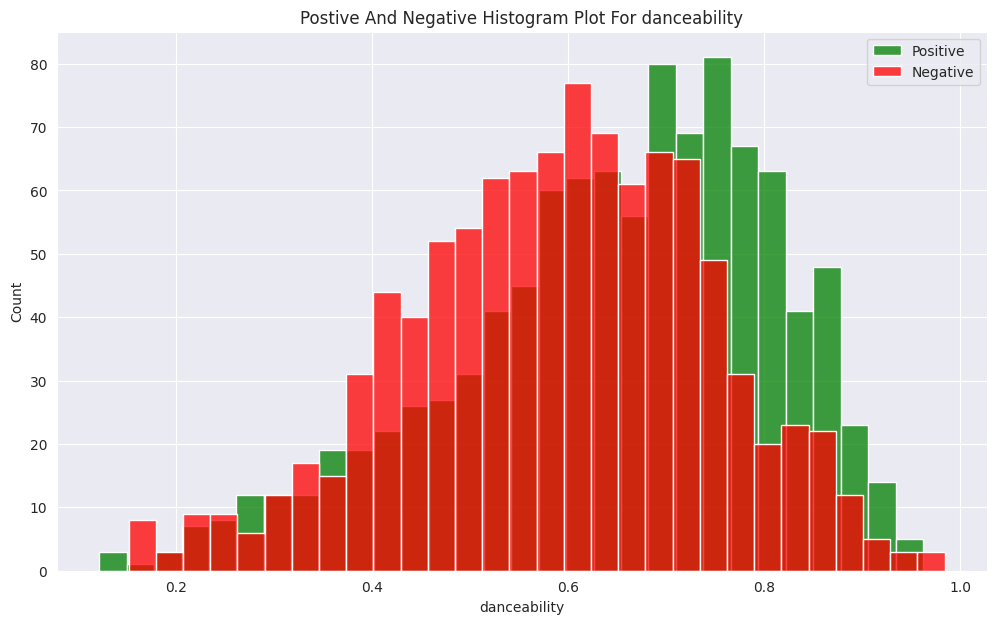

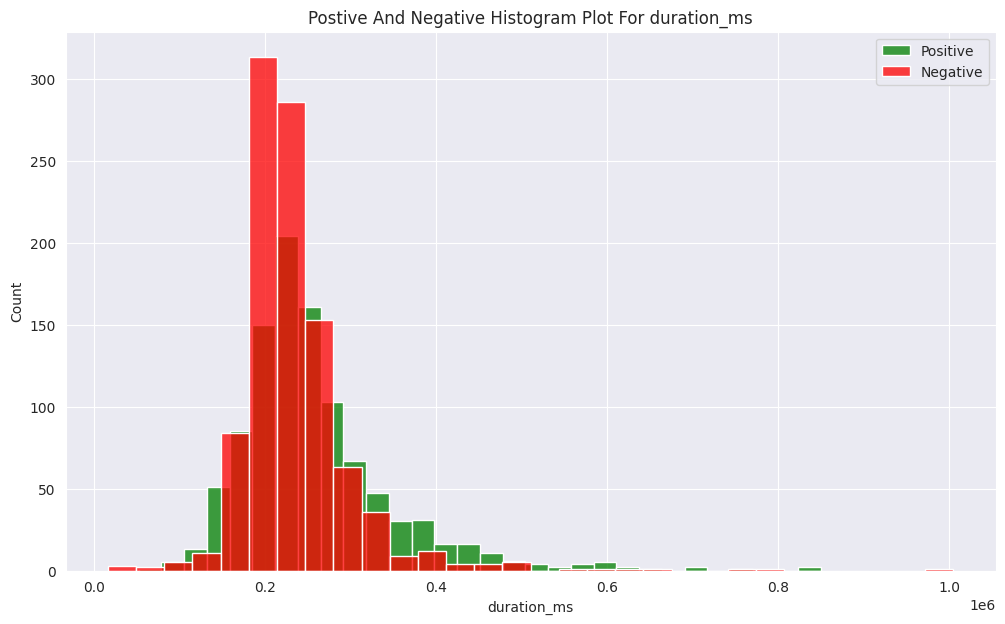

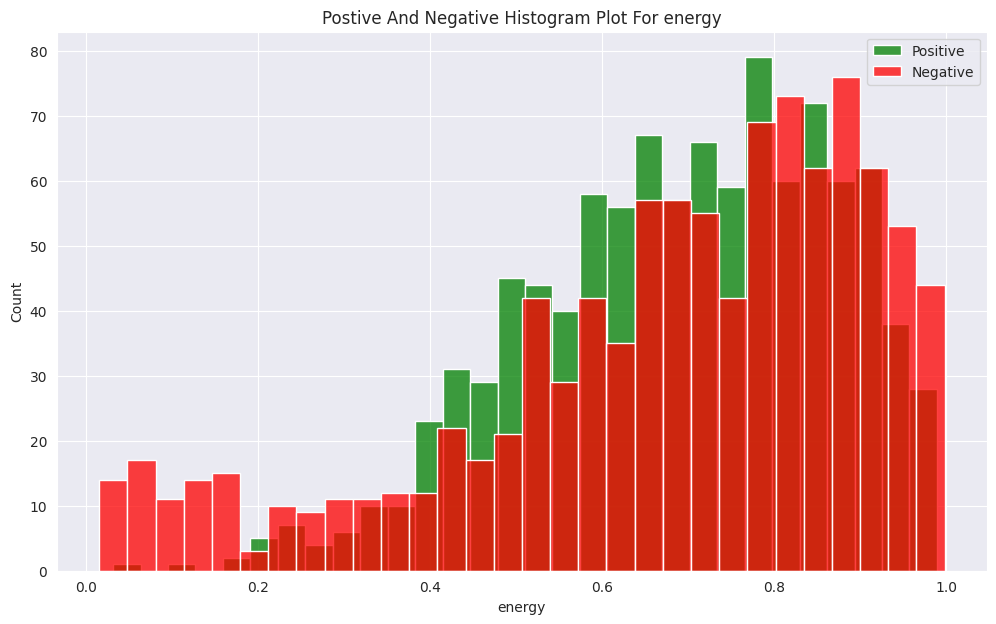

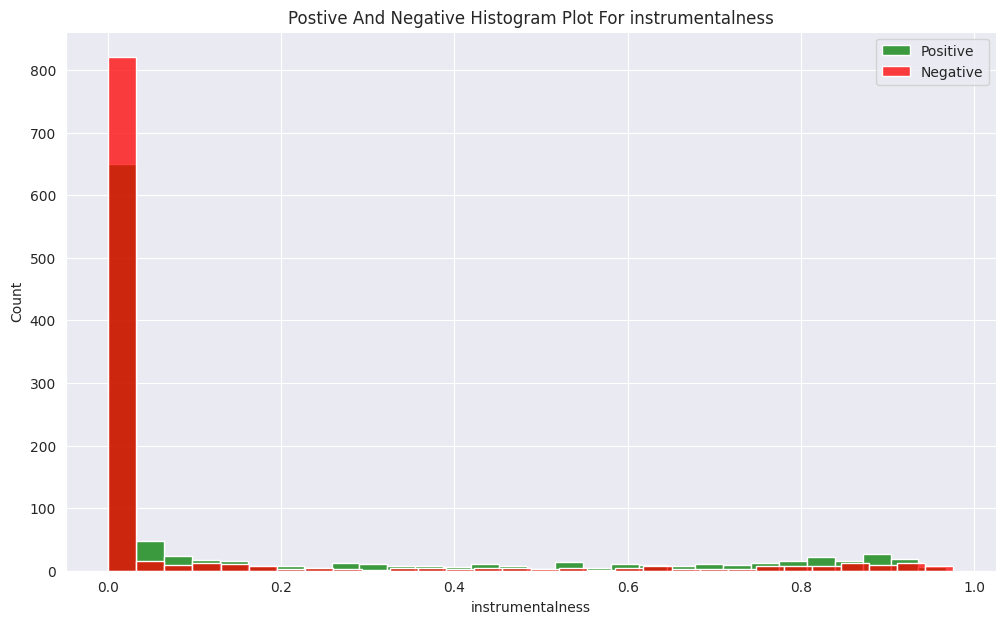

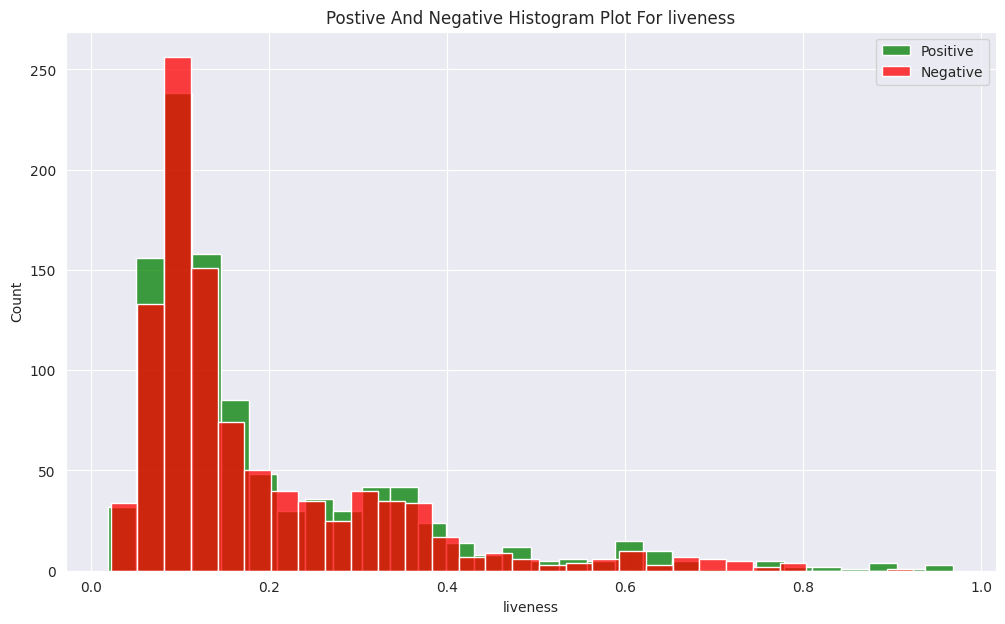

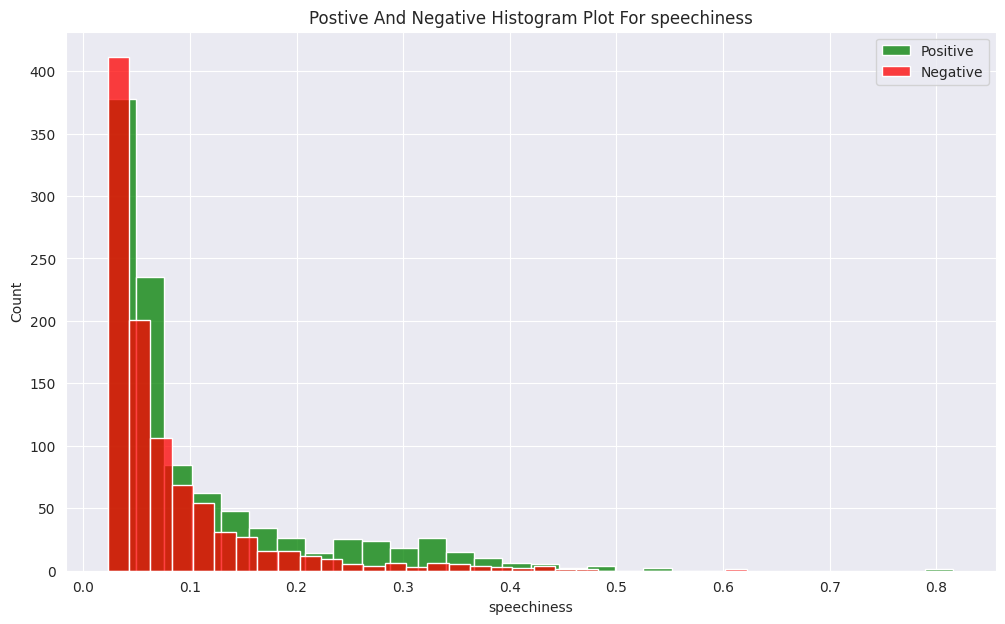

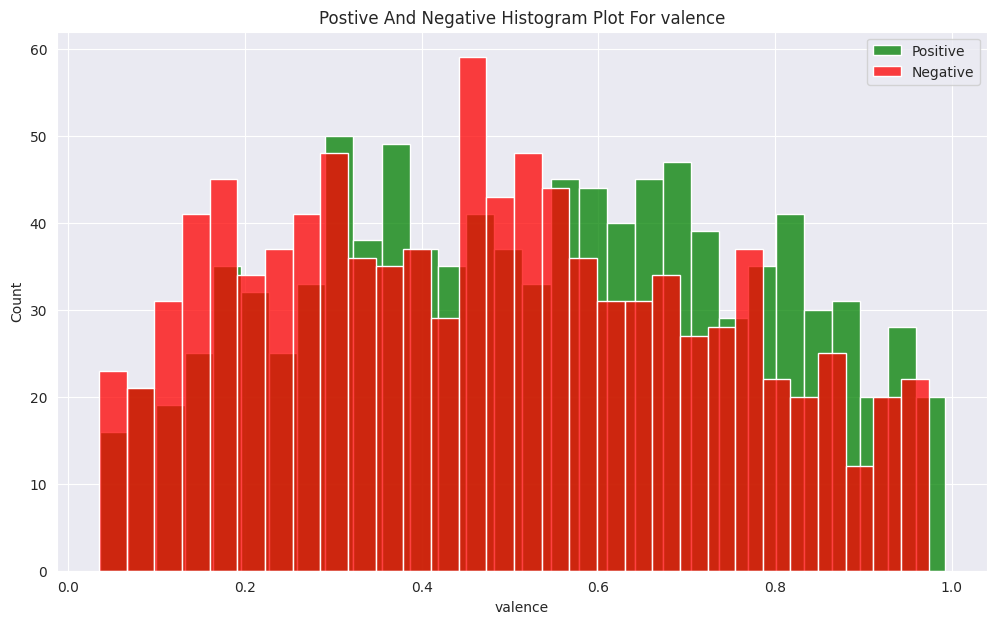

In [7]:
for feature_col in interest_feature_cols:
    pos_data = df[df["target"] == 1][feature_col]
    neg_data = df[df["target"] == 0][feature_col]

    plt.figure(figsize=(12,7))

    sns.histplot(pos_data,bins=30, label="Positive", color='green')
    sns.histplot(neg_data,bins=30, label="Negative", color='red')

    plt.legend(loc='upper right')
    plt.title(f"Postive And Negative Histogram Plot For {feature_col}")
    plt.show()

### Top 10 energetic tracks

In [ ]:
top_ten_energetic_tracks = df[['artist', 'song_title', 'energy']].sort_values(by='energy',ascending=False)[:10]
top_ten_energetic_tracks

,artist,song_title,energy
1299,Thy Art Is Murder,No Absolution,0.998
1322,Walking Dead On Broadway,Pitchblack,0.997
1297,A Wake in Providence,A Darkened Gospel,0.994
1347,Suicide Silence,Unanswered,0.993
1332,Within The Ruins,Beautiful Agony,0.992
1680,A Day To Remember,Paranoia,0.992
2015,Twin Moons,First Contact,0.992
1328,Conjonctive,Down into the Abyss,0.991
1296,Victim Of Deception,Black Colors,0.990
1681,Beartooth,Hated,0.990


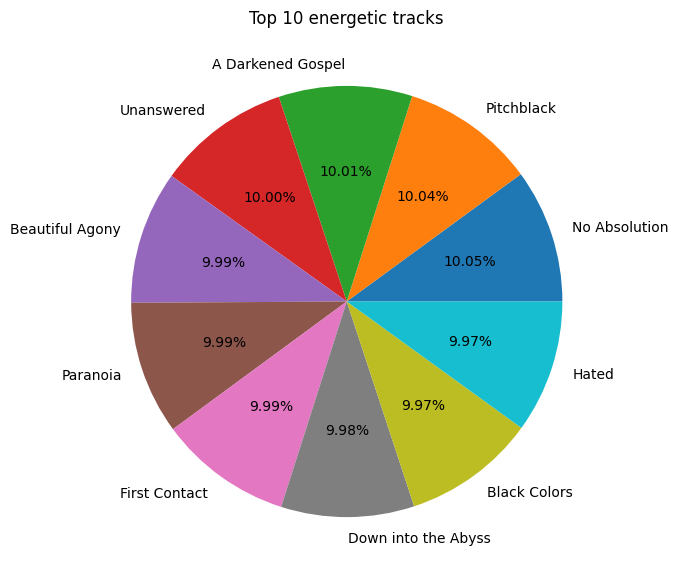

In [ ]:
plt.figure(figsize=(12,7))
plt.pie(x='energy',data=top_ten_energetic_tracks,autopct='%1.2f%%',labels=top_ten_energetic_tracks.song_title)
plt.title("Top 10 energetic tracks")
plt.show()

### Most common durations

In [ ]:
most_common_durations = df[['duration_ms']].value_counts()[:1]
most_common_durations

,count
duration_ms,
192000,5


### Most popular artist

In [ ]:
most_popular_artist = df.groupby('artist').count().sort_values('song_title',ascending=False)[:1]
most_popular_artist['song_title']

,song_title
artist,
Drake,16


### Top 10 tracks with most valence

In [ ]:
top_10_tracks_with_most_valence = df[['artist','song_title','valence']].sort_values(by='valence',ascending=False)[:10]
top_10_tracks_with_most_valence

,artist,song_title,valence
460,Ida Engberg,Abataka - Original Mix,0.992
912,Fats Domino,I'm Walkin' - 2002 Digital Remaster,0.975
1966,Polina,"To Roz Bikini (Itsy, Bitsy, Teenie, Weenie)",0.974
207,George McCrae,Look at You,0.973
48,T. P. Orchestre Poly-Rythmo,Azon de ma gnin kpevi,0.973
1590,The Kids Band,Jelly On A Plate,0.972
337,Gary's Gang,Let's Lovedance Tonight - Danny Krivit Re-edit...,0.972
838,Gary's Gang,Let's Lovedance Tonight - Danny Krivit Re-edit...,0.971
497,Nickodemus,Mi Swing es Tropical,0.968
72,Dusty Springfield,Spooky,0.967


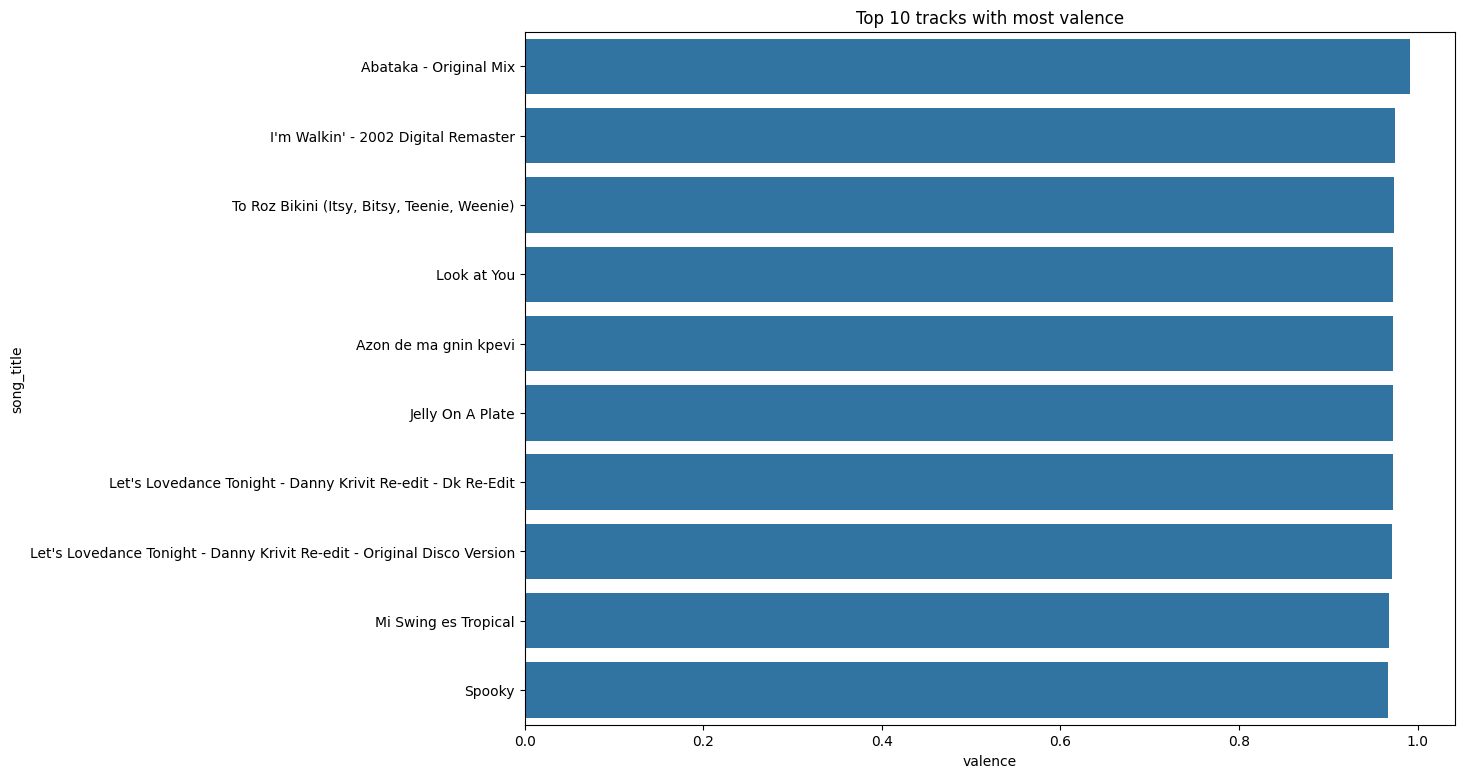

In [ ]:
plt.figure(figsize=(12,9))
sns.barplot(x='valence',y='song_title',data=top_10_tracks_with_most_valence)
plt.title("Top 10 tracks with most valence")
plt.show()

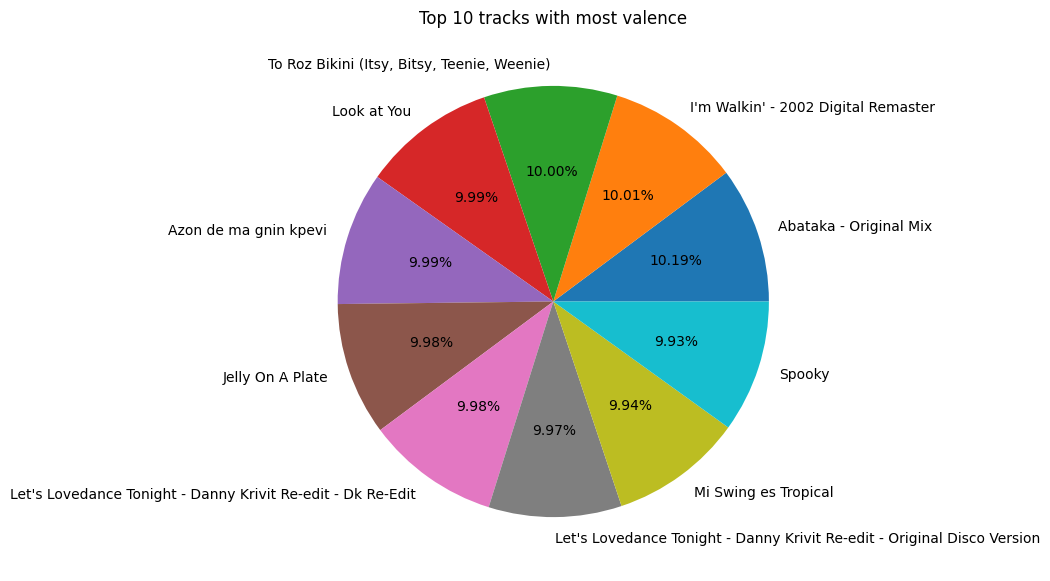

In [ ]:
plt.figure(figsize=(12,7))
plt.pie(x='valence',data=top_10_tracks_with_most_valence,autopct='%1.2f%%',labels=top_10_tracks_with_most_valence.song_title)
plt.title("Top 10 tracks with most valence")
plt.show()